In [1]:
import numpy as np
import os
import sdc_jax as sdc
import matplotlib.pyplot as plt

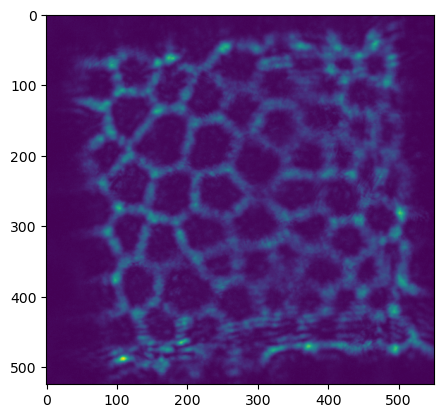

In [13]:
datafolder = '/mnt/neerja-DATA/SDCData/2024-09-27/psf_10x_5micron'
bits = 16
crop_indices = [725,1250,200,750]

psf_meas = sdc.importTiff(datafolder,'meas.tiff')/2**bits
try:
    background = sdc.importTiff(datafolder,'bg.tiff')/2**bits
except:
    print('No background image found, continuing without background subtraction')
    background = torch.zeros(sample_meas.shape)
psf = sdc.cropci((psf_meas-background).clip(0,1),crop_indices)
# psf = (psf_meas-background).clip(0,1)
plt.imshow(psf)
# plt.colorbar()

save_loc = 'psf_2024-09-27.npy'
np.save(save_loc,psf)

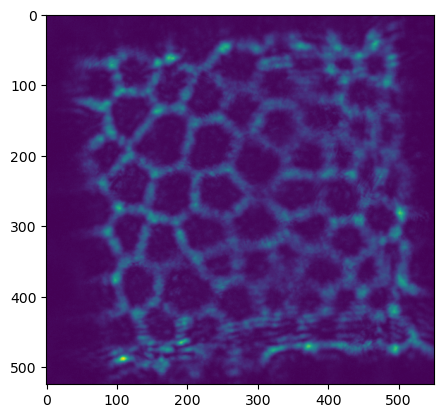

In [14]:
calibration_location = '../PlottingCode/Calibration_data/'
psf_name = 'psf_2024-09-27.npy'
sensor_psf = np.load(os.path.join(calibration_location, psf_name))
plt.imshow(sensor_psf)